## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la computacion
## Carrera: Ingenieria en Computacion Inteligente
## Curso: Machine  y Deep Learning
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Guillermo González Lara (237864)
 Semestre: Enero_Junio del 2026

## Practica 8: Redes neuronales (Formas de Entrenamiento)


### 1). Modelo de Entrenamiento Basado en Tabla de Aprendizaje y Tabla Testing

Este es el enfoque conocido como the validation test approach. Según la documentación proporcionada:

Un modelo de entrenamiento y prueba basado en una tabla de datos es un enfoque utilizado en aprendizaje automático donde los datos de entrada están organizados en forma de tabla, como en bases de datos o archivos CSV. Para evaluar correctamente el modelo, se dividen los datos en dos partes:

- Entrenamiento (Train): 70-80% de los datos, usados para que el modelo aprenda.

- Prueba (Test): 20-30% de los datos, usados para evaluar el rendimiento del modelo.

### Paso 1: Importar las librerías necesarias

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Paso 2: cargamos el dataset

In [2]:
os.chdir("C:/Users/Laremo/Documents/git/MDL-2026/Practica 5/")
datos = pd.read_csv('iris.csv', delimiter=';', decimal=".")

print(datos.shape)
print(datos.head())

(150, 5)
   s.largo  s.ancho  p.largo  p.ancho    tipo
0      5.1      3.5      1.4      0.2  setosa
1      4.9      3.0      1.4      0.2  setosa
2      4.7      3.2      1.3      0.2  setosa
3      4.6      3.1      1.5      0.2  setosa
4      5.0      3.6      1.4      0.2  setosa


### Paso 3: Elimina la variable categórica, deja las variables predictoras en X

In [3]:
X = datos.iloc[:, :4]
print(X.head())

   s.largo  s.ancho  p.largo  p.ancho
0      5.1      3.5      1.4      0.2
1      4.9      3.0      1.4      0.2
2      4.7      3.2      1.3      0.2
3      4.6      3.1      1.5      0.2
4      5.0      3.6      1.4      0.2


### Paso 4: Deja la variable a predecir en y

In [4]:
y = datos.iloc[:,4:5]
print(y.head())

     tipo
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


### Paso 5: Enfoque Training-Testing para medir el error

c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

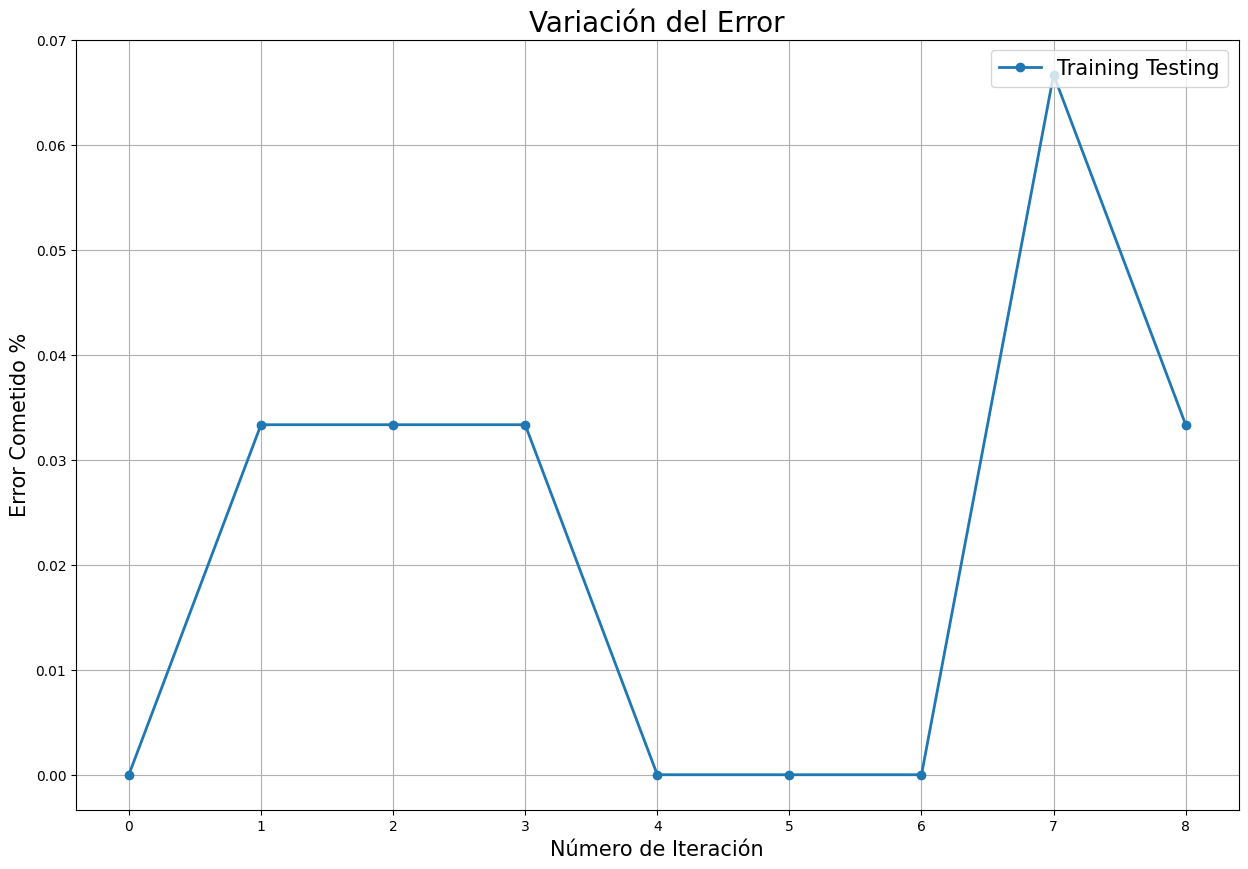

In [5]:
error_tt = []

for i in range(0, 9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

    instancia_red = MLPClassifier()
    instancia_red.fit(X_train,y_train.iloc[:,0].values)
    error_tt.append(1 - instancia_red.score(X_test, y_test))

plt.figure(figsize=(15,10))
plt.plot(error_tt, 'o-', lw = 2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing'], loc = 'upper right', fontsize = 15)

### Paso 6: Enfoque Tabla Completa (como tabla de training y testing) para medir el error

### El Enfoque de Tabla Completa en Machine Learning se refiere a una estrategia donde los datos de entrenamiento y prueba se organizan en una tabla completa, y el error del modelo se evalúa considerando todos los ejemplos disponibles.

In [ ]:
error_tc = []

for i in range(0, 9):
    #knn = KNeighborsClassifier(n_neighbors = 8)
    instancia_red = MLPClassifier()
    instancia_red.fit(X, y.values.ravel())
    
    error_tc.append(1 - instancia_red.score(X, y))

plt.figure(figsize=(15,10))
plt.plot(error_tt, 'o-', lw = 2)
plt.plot(error_tc, 'o-', lw = 2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing', 'Tabla Completa'], loc = 'upper right', fontsize = 15)

c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

### Paso 7: Validación Cruzada


La validación cruzada es una técnica utilizada en aprendizaje automático y estadísticas para evaluar el rendimiento de un modelo.

Se entrena el modelo con todos los datos menos una muestra y se evalúa con la muestra restante.

## Enfoque Validación Cruzada Dejando Uno Fuera (Leave-One-Out Cross-Validation, LOOCV) sirve para medir el error

### Tiene dos ventajas:
* El error está menos sobrestimado.
* Hay menor variación en el error.

### Desventaja:
* Puede tardar demasiado tiempo pues tiene que construir n modelos donde n es la cantidad de filas de la matriz.

In [ ]:
n = datos.shape[0]
error_loo = []

for i in range(0, 9):
    error_i = 0
    
    for j in range(0, n):
        # Separar datos: todos menos j son entrenamiento, j es prueba
        X_train = X.drop(j, axis=0)
        X_test = X.iloc[j, :]
        y_train = y.drop(j, axis=0)
        y_test = y.iloc[j]
        
        # Modelo
        instancia_red = MLPClassifier()
        instancia_red.fit(X_train, y_train.values.ravel())
        
        # Predicción
        prediccion = instancia_red.predict(pd.DataFrame(X_test).T)
        
        # --- PARTE INFERIDA ---
        # Si la predicción es distinta al valor real, incrementamos el error
        if prediccion[0] != y_test.values[0]: # Se usa [0] para acceder al valor escalar
            error_i += 1
            
    # Al salir del bucle interno (j), calculamos la tasa de error para esta iteración (i)
    # Tasa de error = Total de errores / Total de datos
    error_loo.append(error_i / n)

# Opcional: Graficar (basado en el estilo de las otras imágenes)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(error_loo, 'o-', lw=2)
plt.xlabel("Número de Iteración", fontsize=15)
plt.ylabel("Error Cometido %", fontsize=15)
plt.title("Variación del Error (LOOCV)", fontsize=20)
plt.grid(True)
plt.legend(['Dejando Uno Fuera'], loc='upper right', fontsize=15)

### Dejando uno fuera

## 4). Validación Cruzada Usando K Grupos (K-fold cross-validation)

K-Fold es una técnica de validación cruzada que divide el conjunto de datos en K partes (o folds) de tamaño similar. El modelo se entrena y evalúa K veces, utilizando en cada iteración una parte diferente como conjunto de prueba, mientras que el resto se usa para el entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

error_cv = []

for i in range(0, 9):
    kfold = KFold(n_splits = 10, shuffle = True)
    error_folds = []
    
    for train, test in kfold.split(X, y):
        #knn = KNeighborsClassifier(n_neighbors = 8)
        instancia_red = MLPClassifier()
        instancia_red.fit(X.iloc[train], y.iloc[train].values.ravel())
        error_folds.append((1 - instancia_red.score(X.iloc[test], y.iloc[test])))
        
    error_cv.append(np.mean(error_folds))

plt.figure(figsize=(15,10))
plt.plot(error_tt, 'o-', lw = 2)
plt.plot(error_tc, 'o-', lw = 2)
plt.plot(error_loo, 'o-', lw = 2)
plt.plot(error_cv, 'o-', lw = 2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing', 'Tabla Completa', 'Dejando Uno Fuera', 'K-Fold CV'], loc = 'upper right', fontsize = 15)

 ### Con clu siones
 En esta practica implementamos cuatro enfoques de entrenamiento: el enfoque Basado en Tabla de Aprendizaje y Tabla Testing (the validation test approach), el enfoque Basado en Tabla Completa (como tabla de training y testing), LOOCV y K-Folds para medir el error. Los enfoques utilizaron una red neuronal con la técnica de propagación hacia atras (por sus siglas en el idioma Ingles NNBP). La red NNBP se implento utilizando la libreria de código abierto SCIKIT-LEARN.



### Referencias
Learning in Python, (2025). URL: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Rodriguez (2025). Reporte Técnico de PROMIDAT: http://promidat.com/ (Ultimo acceso febrero 2025).